In [6]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import time

from scripts.get_top_stocks import *
from scripts.generate_dataset_features import *
from scripts.utils import *
from scripts.dataloader import *
from scripts.train_predict import *
from scripts.models import *

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# mnist dataset

In [8]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader,random_split

# Define transformations for the training and testing sets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalizing with mean and std of the MNIST dataset
])

# Load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [9]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_dataset.__len__(),val_dataset.__len__(),test_dataset.__len__()

(48000, 12000, 10000)

In [10]:
# Create DataLoader objects
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Example: Iterate through the DataLoader
for batch_idx, (data, target) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}")
    print(f"Data shape: {data.shape}")
    print(f"Target shape: {target.shape}")
    break  # Just to demonstrate, breaking after the first batch

# Check the number of batches
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Batch 1
Data shape: torch.Size([64, 1, 28, 28])
Target shape: torch.Size([64])
Number of training batches: 750
Number of test batches: 10


# pytorch model

epoch 0
model epoch 0 saved as fcn.pt
Epoch 1/100, train loss: 0.3531, val loss: 0.2038, time_taken: 5.1
train acc: 89.58, val_acc: 93.86
epoch 1
model epoch 1 saved as fcn.pt
Epoch 2/100, train loss: 0.2366, val loss: 0.1744, time_taken: 4.8
train acc: 93.0, val_acc: 94.64
epoch 2
model epoch 2 saved as fcn.pt
Epoch 3/100, train loss: 0.1985, val loss: 0.1364, time_taken: 4.8
train acc: 94.03, val_acc: 95.89
epoch 3
model epoch 3 saved as fcn.pt
Epoch 4/100, train loss: 0.1760, val loss: 0.1276, time_taken: 4.7
train acc: 94.53, val_acc: 96.19
epoch 4
model epoch 4 saved as fcn.pt
Epoch 5/100, train loss: 0.1563, val loss: 0.1130, time_taken: 4.5
train acc: 95.25, val_acc: 96.49
epoch 5
model epoch 5 saved as fcn.pt
Epoch 6/100, train loss: 0.1458, val loss: 0.1081, time_taken: 4.6
train acc: 95.44, val_acc: 96.81
epoch 6
model epoch 6 saved as fcn.pt
Epoch 7/100, train loss: 0.1303, val loss: 0.1014, time_taken: 5.1
train acc: 95.94, val_acc: 97.07
epoch 7
model epoch 7 saved as fcn.

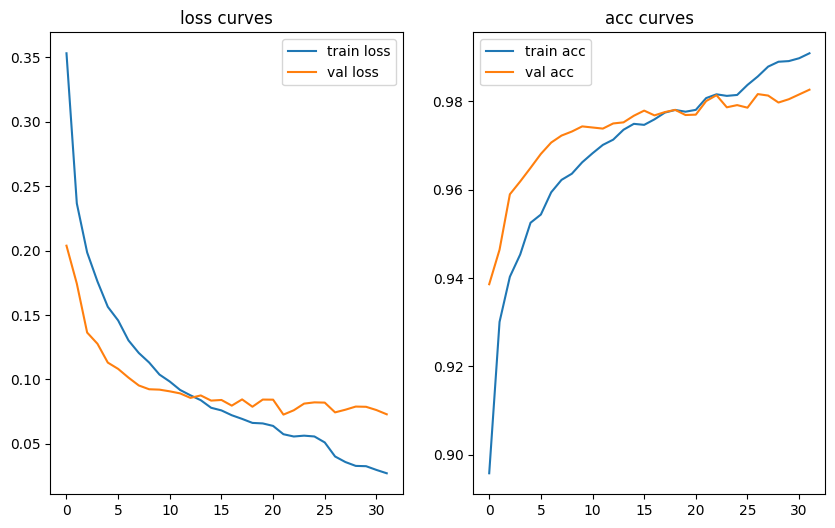

In [12]:
# define model inputs

device = torch.device('cpu')
lr= 1e-3
epochs = 100
scheduler_factor=0.5
scheduler_patience=3
early_stopping_limit = 10
class_weights = []
criterion = 'cross'
num_features = 784
num_classes = 10

model, train_losses, val_losses, train_accs, val_accs = train(
    device=device,
    lr=lr,
    epochs=epochs,
    scheduler_factor=scheduler_factor,
    scheduler_patience=scheduler_patience,
    early_stopping_limit=early_stopping_limit,
    class_weights=class_weights,
    criterion=criterion,
    train_loader=train_loader,
    val_loader=val_loader,
    num_features=num_features,
    num_classes=num_classes,
)
plot_loss_acc(train_losses, val_losses, train_accs, val_accs)

In [24]:
model

FCN(
  (f): Flatten(start_dim=1, end_dim=-1)
  (fcn): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1024, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Tanh()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [26]:
model.eval()

# Initialize variables to store the number of correct predictions and the total number of predictions
correct = 0
total = 0

# Disable gradient calculations for evaluation
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(correct/total)

0.9825
